In [1]:
#Import datasets
import pandas as pd 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics  import classification_report, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from joblib import dump, load

In [2]:
X = pd.read_excel('features.xlsx')
y = pd.read_excel('binaryclass_labels.xlsx').to_numpy().ravel()


# Define the pipeline
pipeline = Pipeline([
    ('replace_inf', SimpleImputer(strategy='median', missing_values=np.inf)),
    ('replace_nan', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scale_data', StandardScaler()),
    ('clf', GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=42))
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier using the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        high       0.68      0.39      0.49       132
         low       0.88      0.96      0.92       596

    accuracy                           0.86       728
   macro avg       0.78      0.67      0.70       728
weighted avg       0.84      0.86      0.84       728



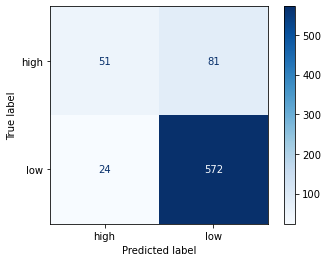

Accuracy: 0.8557692307692307


In [3]:
plot_confusion_matrix(pipeline, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

In [4]:
# Evaluate model using 5-fold cross-validation
scores = cross_val_score(pipeline, X, y, cv=5)

# Print average performance across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.12)


In [6]:
dump(pipeline, 'GB_high_model.pkl')

['GB_high_model.pkl']